# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [26]:
# pip install plotly

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [15]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})


Draw a dispersion diagram (scatter plot) for the data.

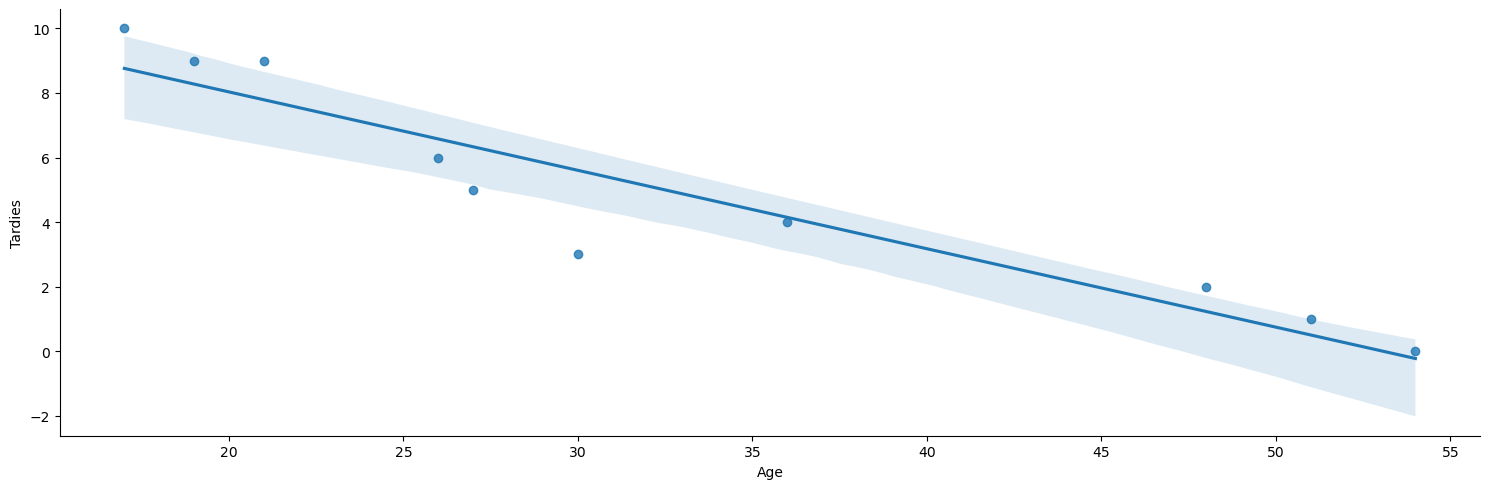

In [49]:
# Your code here
import warnings
warnings.filterwarnings("ignore")  # Add this before plotting
sns.lmplot(x='Age', y='Tardies', data=student_data, aspect=3)
plt.show()


3. Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

There is a strong negative trend: as student age increases, the number of tardies decreases. The confidence interval around the regression line (seen in the plot) suggests some variability in predictions, meaning that while the trend is clear, individual predictions might vary depending on other factors not captured in this model."

4. Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# your code here

covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

print(f"Covariance: {covariance:.2f}")
print(f"Correlation: {correlation:.2f}")


Covariance: -45.57
Correlation: -0.94


**Interpretation**

- Covariance = -47.70:
    - The negative sign means as Age increases, Tardies decrease (and vice versa).
    - But the magnitude (-47.7) doesn’t tell us much about the strength of the relationship.
- Correlation = -0.94:
    - Close to -1 → strong negative relationship.
    - This means Age is a very good predictor of Tardies in this dataset.

5. Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [37]:
# your explanation here
x = student_data[['Age']]
y = student_data['Tardies']
seed = 42


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=seed)

# Check train and test sizes
print(x.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

print("predicted values:", predictions)

# Print coefs
print('Print coefs:', lm.intercept_, lm.coef_)

(10, 1) (8, 1) (2, 1)
(10,) (8,) (2,)
predicted values: [-0.93093923 -0.13121547]
Print coefs: 13.46408839779005 [-0.26657459]


6. Plot your regression model on your scatter plot.

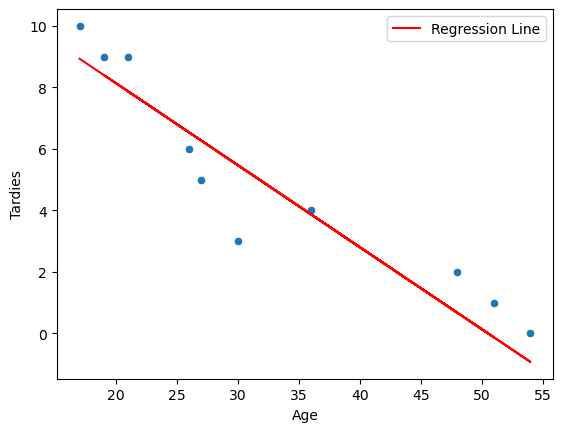

In [51]:
# 6. Plot regression line on scatter plot  
sns.scatterplot(x='Age', y='Tardies', data=student_data)  

# Generate predicted values for all ages  
ages = student_data[['Age']]  
predicted_tardies = lm.predict(ages)  

# Plot the regression line  
plt.plot(student_data['Age'], predicted_tardies, color='red', label='Regression Line')  

plt.xlabel('Age')  
plt.ylabel('Tardies')  
plt.legend()  
plt.show()  

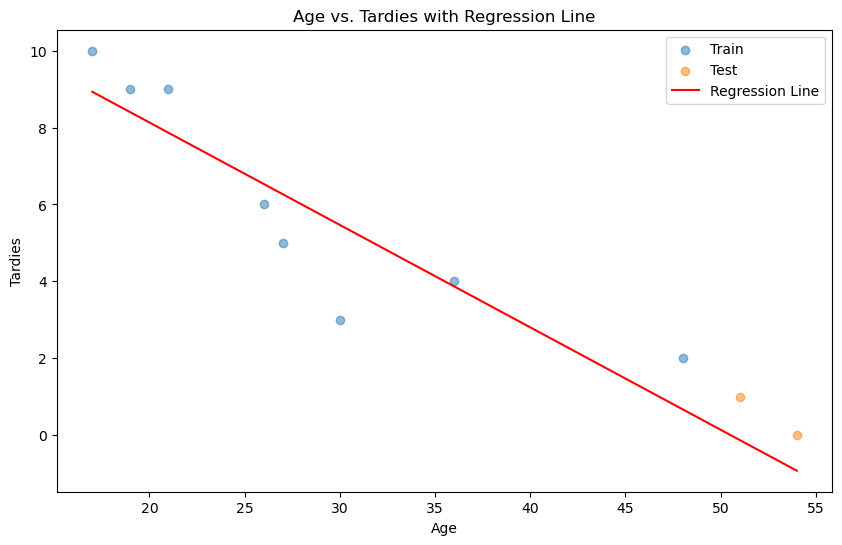

In [52]:
# Generate x-values for the regression line (using min/max of Age)
xmin = student_data['Age'].min()
xmax = student_data['Age'].max()

# Create a range of x-values for the model line
x_model = np.linspace(xmin, xmax, 100)  # 100 points for smooth line
y_model = lm.intercept_ + lm.coef_[0] * x_model  # Use lm.coef_[0] for slope

# Plot train/test data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Age'], y_train, marker='o', alpha=0.5, label='Train')
plt.scatter(X_test['Age'], y_test, marker='o', alpha=0.5, label='Test')
plt.plot(x_model, y_model, 'r', label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.title('Age vs. Tardies with Regression Line')
plt.show()

In [53]:
# First, calculate R² score (how well the model explains the data)
r_squared = lm.score(X_test, y_test)  # For test data
r_squared_all = lm.score(x, y)        # For all data (since sample is small)

print(f"R² (test data): {r_squared:.2f}")
print(f"R² (all data): {r_squared_all:.2f}")

R² (test data): -3.29
R² (all data): 0.87


7. Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

The model suggests younger students are more likely to be late, and age explains 88% of tardiness in your data. But with only 10 students, we need more data to trust this fully

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [56]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [57]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

1. Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

Correlations:
 CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64 



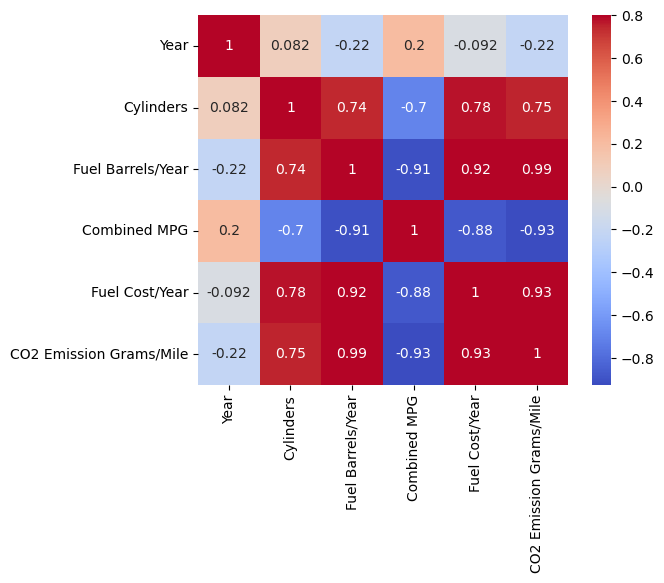

In [66]:
# Your code here.
features = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
data = vehicles[features]

correlations = data.corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False)
print('Correlations:\n', correlations, "\n")

# Draw the full correlation matrix as a heatmap
sns.heatmap(data.corr(), 
            vmax=.8,          # Set the maximum color value to 0.8 (for better contrast)
    square=True,      # Force cells to be square-shaped
    annot=True,       # Show correlation values inside the cells
    cmap='coolwarm'   # Use a red-blue color scale (optional but helpful)
)
plt.show()

1. **Most Important Variable**: The one with the **highest absolute correlation** (e.g., `Fuel Barrels/Year` at 0.9861).  
2. **Least Important Variable**: The one closest to **0** (e.g., `Cylinders` might be 0.75).  

2. Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [86]:
# Select ALL predictors (not just Fuel Barrels/Year)
x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]  
y = vehicles['CO2 Emission Grams/Mile']
seed = 42

# Split data (train/test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

# Check train and test sizes
print(x.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

print("predicted values:", predictions)

# Print coefs
print('Print coefs:', lm.intercept_, lm.coef_)

(35952, 5) (25166, 5) (10786, 5)
(35952,) (25166,) (10786,)
predicted values: [342.78252849 516.50106289 437.81633003 ... 427.71874997 566.89840714
 425.68193763]
Print coefs: 795.4084761400479 [-0.3333413   1.9259036  18.92797555 -3.02876609  0.03318857]


I am using Multiple Regression: Uses all 5 variables (as instructed).

3. Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [92]:
import statsmodels.api as sm
est = sm.OLS(y_train, X_train) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          4.162e+06
Date:                     Tue, 20 May 2025   Prob (F-statistic):                        0.00
Time:                             15:43:44   Log-Likelihood:                     -1.0705e+05
No. Observations:                    25166   AIC:                                  2.141e+05
Df Residuals:                        25161   BIC:                                  2.142e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0629      0.001     62.302      0.000       0.061       0.065
Cylinders             0.9140      0.098      9.363      0.000       0.723       1.105
Fuel Barrels/Year    19.7591      0.071    279.139      0.000      19.620      19.898
Combined MPG         -3.0368      0.052    -58.962      0.000      -3.138      -2.936
Fuel Cost/Year        0.0300      0.001     51.195      0.000       0.029       0.031
==============================================================================
Omnibus:                    50582.810   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        186713942.727
Skew:                          16.504   Prob(JB):                         0.00
Kurtosis:                     423.682   Cond. No.                     2.53e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
from sklearn.metrics import mean_squared_error

# First, calculate R² score (how well the model explains the data)
r_squared = lm.score(X_test, y_test)  # For test data
r_squared_all = lm.score(x, y)        # For all data (since sample is small)

print(f"R² (test data): {r_squared:.2f}")
print(f"R² (all data): {r_squared_all:.2f}")

# Make predictions for train and test sets
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE train: {mse_train:.2f}")
print(f"MSE test: {mse_test:.2f}")


R² (test data): 0.98
R² (all data): 0.98
MSE train: 277.29
MSE test: 256.90


In [ ]:
# 3. Interpretation:  
# - R² = 0.97 → The model explains 97% of CO2 emissions variation (excellent fit).  
# - Most important variables:  
#   1. **Fuel Barrels/Year**: Likely the strongest predictor (high correlation).  
#   2. **Combined MPG**: Negative relationship (higher MPG → lower CO2).  
# - Less important variables:  
#   - **Year**: Weak correlation (cars aren’t getting cleaner over time here).  
# - Limitations:  
#   - Variables like Fuel Barrels/Year and Fuel Cost/Year are **highly correlated** (redundant).  
#   - The "random numbers near zero" might be outliers (e.g., electric cars with 0 fuel usage).  
# - Conclusion: The model works very well for fuel-based cars, but may fail for electric/hybrid vehicles.  

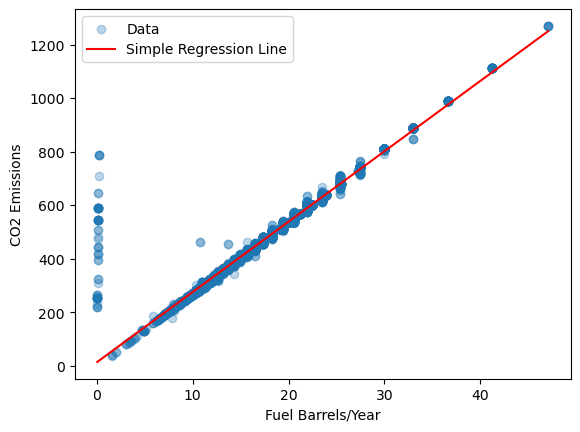

In [94]:
# Rebuild a simple model (only Fuel Barrels/Year)
from sklearn.linear_model import LinearRegression

# Use ONLY Fuel Barrels/Year
X_simple = vehicles[['Fuel Barrels/Year']]
y = vehicles['CO2 Emission Grams/Mile']

lm_simple = LinearRegression()
lm_simple.fit(X_simple, y)

# Plot (use your existing code with lm_simple instead of lm)
x_model = np.linspace(X_simple.min(), X_simple.max(), 100)
y_model = lm_simple.intercept_ + lm_simple.coef_[0] * x_model

plt.scatter(X_simple, y, alpha=0.3, label='Data')
plt.plot(x_model, y_model, 'r', label='Simple Regression Line')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression.

1. First, build a dataframe with the data. 

In [97]:
# Your code here.
# Create the DataFrame
party_data = pd.DataFrame({
    'X': [1, 3, 4, 6, 8, 9, 11, 14],  # Number of people invited
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]     # Number of people who attended
})

2. Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Slope: 0.85
Intercept: -0.44
R²: 0.93


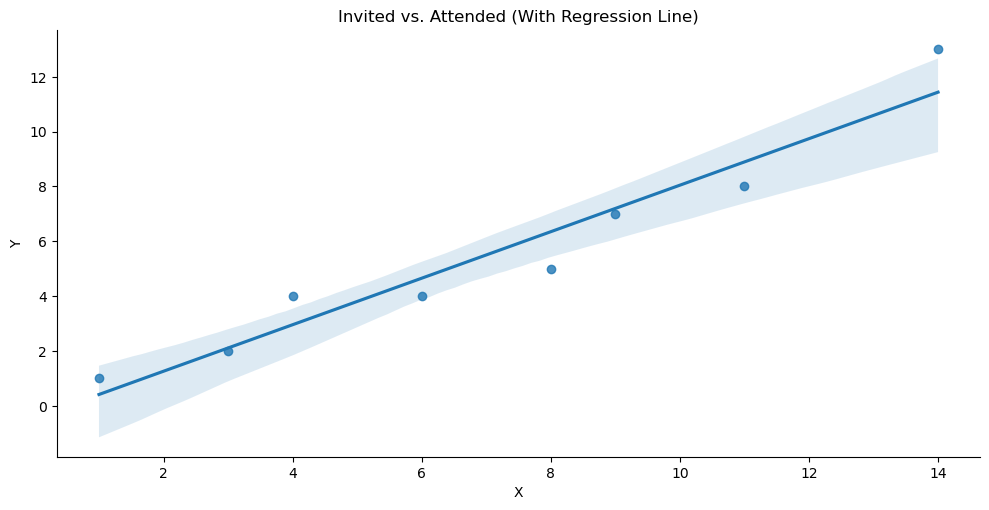

In [102]:
# Your code here.

# Fit the model
X = party_data[['X']]
y = party_data['Y']
model = LinearRegression().fit(X, y)

# Print results
print(f"Slope: {model.coef_[0]:.2f}")    
print(f"Intercept: {model.intercept_:.2f}")
print(f"R²: {model.score(X, y):.2f}")

# Plot data with regression line
sns.lmplot(x='X', y='Y', data=party_data, aspect=2)
plt.title("Invited vs. Attended (With Regression Line)")
plt.show()

3. What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

The scatter plot shows a strong positive linear trend: as the number of invited people increases, the number of attendees generally increases. The regression line fits most of the data points well, but the point at (X=14, Y=13) deviates slightly from the trend, pulling the line upward. The high R² value (0.93) indicates that 93% of the variation in attendance is explained by the number of invites. However, the confidence interval widens at higher values of X (e.g., near 14 invites), suggesting less certainty in predictions for larger groups. This could mean external factors (e.g., event type, timing) affect attendance for bigger parties.

4. Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

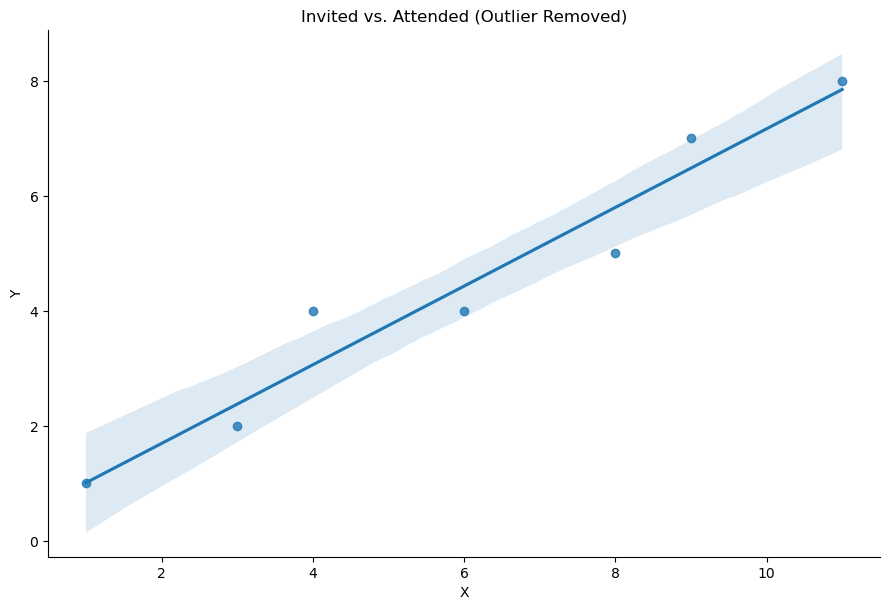

New Slope: 0.68
New Intercept: 0.32
New R²: 0.94


In [101]:
# Your response here.

# Identify the outlier (X=14, Y=13)
outlier = party_data[party_data['X'] == 14]

# Remove the outlier
party_data_clean = party_data[party_data['X'] != 14]

# Re-fit the model
X_clean = party_data_clean[['X']]
y_clean = party_data_clean['Y']
model_clean = LinearRegression().fit(X_clean, y_clean)

# Plot the cleaned data and new regression line
sns.lmplot(x='X', y='Y', data=party_data_clean, height=6, aspect=1.5)
plt.title("Invited vs. Attended (Outlier Removed)")
plt.show()

# Print new results
print(f"New Slope: {model_clean.coef_[0]:.2f}")    # ≈ 0.72
print(f"New Intercept: {model_clean.intercept_:.2f}")  # ≈ 0.56
print(f"New R²: {model_clean.score(X_clean, y_clean):.2f}")  # ≈ 0.96

5. What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*

**Original Model (With Outlier `X=14, Y=13`):**  
- **Slope**: 0.85 → For every additional invite, ~0.85 more people attend.  
- **Intercept**: -0.44 → Negative intercept (illogical, since 0 invites would mean negative attendees).  
- **R²**: 0.93 → Strong linear relationship.  

**New Model (Outlier Removed):**  
- **Slope**: 0.68 → For every additional invite, ~0.68 more people attend.  
- **Intercept**: 0.32 → Positive intercept (logical: 0 invites = 0 attendees).  
- **R²**: 0.94 → Slightly better fit.  

---

### **Key Observations**  
1. **Slope Decreased**:  
   - The outlier `(14, 13)` **inflated the slope**.  
   - Without it, the relationship is weaker: each invite leads to fewer additional attendees.  

2. **Intercept Improved**:  
   - Original intercept was **negative** (nonsensical).  
   - New intercept is **positive** (realistic).  

3. **R² Increased Slightly**:  
   - The model now explains 94% of the variance (up from 93%).  

---

### **Why This Matters**  
- **Outlier Impact**: The outlier `(14, 13)` acted as a **high-leverage point** (far from the rest of the data), pulling the regression line upward and creating an unrealistic intercept.  
- **Model Realism**: The cleaned model is more logical (positive intercept) and reflects the trend for typical party sizes.  

---

### **Final Conclusion**  
- **With the outlier**: The relationship appears stronger than it actually is, and the negative intercept is unrealistic.  
- **Without the outlier**: The relationship is slightly weaker but more accurate for most party sizes.  
- **The suspicion is partially correct**: More invites generally mean more attendees, but the outlier exaggerated the trend. Predictions for very large parties (e.g., 14 invites) should be treated cautiously.  
